# Health data preprocessing and input modelling exercises.

**In this lab you will:**

* Gain practical knowledge in pre-processing and analysing real world stochastic health system data
* Learn how to fit distribution to data
* Learn how to select a suitable distribution for your data

> **STUDENT BEWARE**: This lab can be very frustrating and will test your `pandas` skills! It is designed to show you the sort of data wrangling, analysis and modelling decisions/assumptions you may need to perform in real simulation study.  But do persevere with it (answers are available as well!).  The experience should demonstrate that fitting distributions to real data is difficult and not quite as textbooks make out! By the end of the lab both your `pandas` skills and simulation input modelling skills will have improved.  >_<  


> **P.s** if you think this Lab is hard then you should have seen the original lab I wrote back in the summer...

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read in raw data

In [2]:
ed = pd.read_csv('syned_data.csv')

In [3]:
ed.shape

(477149, 6)

In [4]:
ed.head()

,Unnamed: 0,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins
0,0,65-84,1.0,2015-07-02,17-20,210.0
1,42,85+,1.0,2017-03-06,09-12,310.0
2,181,45-64,1.0,2014-06-03,13-16,100.0
3,225,65-84,2.0,2015-02-17,05-08,320.0
4,485,45-64,1.0,2017-11-11,05-08,100.0


In [5]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477149 entries, 0 to 477148
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           477149 non-null  int64  
 1   Age_Band             477149 non-null  object 
 2   Sex                  477135 non-null  float64
 3   AE_Arrive_Date       477149 non-null  object 
 4   AE_Arrive_HourOfDay  477137 non-null  object 
 5   AE_Time_Mins         477149 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.8+ MB


In [6]:
ed['AE_Arrive_Date'] = pd.to_datetime(ed['AE_Arrive_Date'])

In [7]:
ed.sort_values(['AE_Arrive_Date', 'AE_Arrive_HourOfDay']).head()

,Unnamed: 0,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins
8218,1131707,25-44,2.0,2014-03-23,01-04,50.0
88673,12172075,85+,2.0,2014-03-23,01-04,130.0
137649,18949836,1-17,1.0,2014-03-23,01-04,140.0
139063,19150123,45-64,2.0,2014-03-23,01-04,160.0
146786,20229698,18-24,2.0,2014-03-23,01-04,230.0


In [8]:
ed.AE_Arrive_Date.max()

Timestamp('2018-03-22 00:00:00')

In [9]:
ed.AE_Arrive_Date.min()

Timestamp('2014-03-23 00:00:00')

In [10]:
#calculate the number of days
days = (ed.AE_Arrive_Date.max() - ed.AE_Arrive_Date.min()).days

In [11]:
select = ['AE_Arrive_Date', 'AE_Arrive_HourOfDay', 'Age_Band']
arrival_pivot = ed[select].groupby(by=['AE_Arrive_Date', 
                                             'AE_Arrive_HourOfDay']).count()

arrival_pivot.columns = ['Arrivals']
arrival_pivot.head()

Arrivals
AE_Arrive_Date AE_Arrive_HourOfDay          
2014-03-23     01-04                      12
               05-08                      20
               09-12                     103
               13-16                      83
               17-20                      79

In [12]:
select = ['AE_Arrive_HourOfDay', 'Age_Band']
arrival_pivot = ed[select].groupby(by=['AE_Arrive_HourOfDay']).count()

arrival_pivot.columns = ['Arrivals']
arrival_pivot['mean_daily_arrivals'] = arrival_pivot['Arrivals'] / days
arrival_pivot['IAT'] = (60 * 4) / arrival_pivot['mean_daily_arrivals']
arrival_pivot

,Arrivals,mean_daily_arrivals,IAT
AE_Arrive_HourOfDay,,,
01-04,30300,20.753425,11.564356
05-08,38106,26.100000,9.195402
09-12,137951,94.486986,2.540032
13-16,122268,83.745205,2.865836
17-20,105236,72.079452,3.329659
21-24,43276,29.641096,8.096867


# Exercise 2: Choosing a distribution to model length of stay

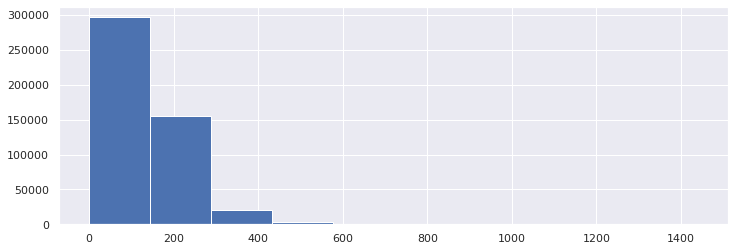

In [13]:
ax = ed['AE_Time_Mins'].hist(figsize=(12,4))

In [14]:
#auto_fit function from pythonhealthcare.org
from input_modelling.fitting import auto_fit

In [15]:
ed['AE_Time_Mins'] = ed['AE_Time_Mins'].astype(float)

In [16]:
## this will take 30 or so seconds to run as it is a lot of data.
auto_fit(ed['AE_Time_Mins'], pp=False, hist=False)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
3      lognorm  3.786096e+04      0.0
2        gamma  5.348789e+04      0.0
5     pearson3  5.349791e+04      0.0
0         beta  5.914355e+04      0.0
6  weibull_min  9.709487e+04      0.0
4         norm  4.461492e+05      0.0
7  weibull_max  8.268370e+05      0.0
1        expon  2.402009e+06      0.0


In [17]:
# Exercise 3: LoS by age banding

In [18]:
#over 65s = 65-84 or 85+
over65s = ed.loc[(ed['Age_Band'] == '65-84') | 
                       (ed['Age_Band'] == '85+')]
over65s.head()

,Unnamed: 0,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins
0,0,65-84,1.0,2015-07-02,17-20,210.0
1,42,85+,1.0,2017-03-06,09-12,310.0
3,225,65-84,2.0,2015-02-17,05-08,320.0
5,615,65-84,2.0,2016-02-29,13-16,100.0
11,1417,65-84,2.0,2018-01-20,09-12,200.0


In [19]:
under85s = ed.loc[ed['Age_Band'] != '85+']

In [20]:
over65s['AE_Time_Mins'].describe()

count    131719.000000
mean        151.419233
std         100.107023
min           0.000000
25%          70.000000
50%         140.000000
75%         210.000000
max        1440.000000
Name: AE_Time_Mins, dtype: float64

In [21]:
under85s['AE_Time_Mins'].describe()

count    434826.000000
mean        129.725637
std          89.441051
min           0.000000
25%          60.000000
50%         110.000000
75%         180.000000
max        1440.000000
Name: AE_Time_Mins, dtype: float64

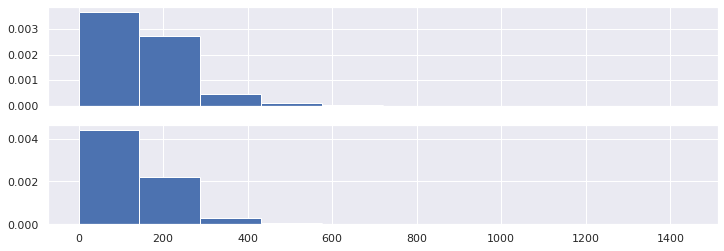

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
ax[0].hist(over65s['AE_Time_Mins'], density=True)
ax[1].hist(under85s['AE_Time_Mins'],  density=True);

In [23]:
over65s['AE_Time_Mins'].to_frame()

,AE_Time_Mins
0,210.0
1,310.0
3,320.0
5,100.0
11,200.0
...,...
477134,140.0
477137,70.0
477142,140.0
477144,100.0



Distributions sorted by goodness of fit:
----------------------------------------
  Distribution     chi_square  p_value
3      lognorm   11354.731464      0.0
7  weibull_max   11865.832721      0.0
0         beta   13007.772147      0.0
5     pearson3   13196.468701      0.0
2        gamma   13198.671072      0.0
6  weibull_min   15778.522941      0.0
4         norm   95095.543795      0.0
1        expon  554730.389177      0.0


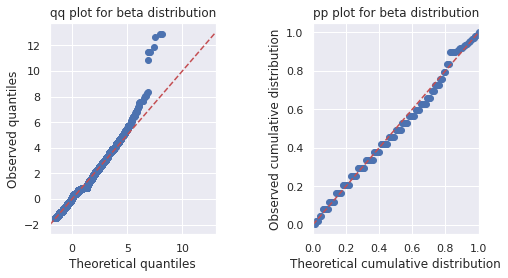

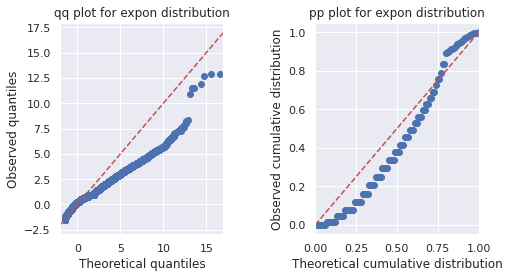

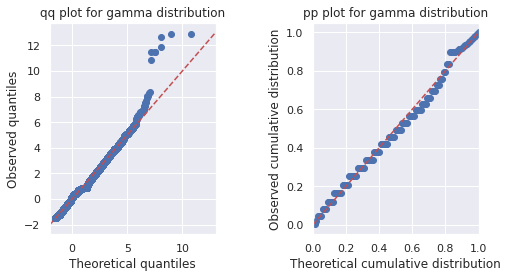

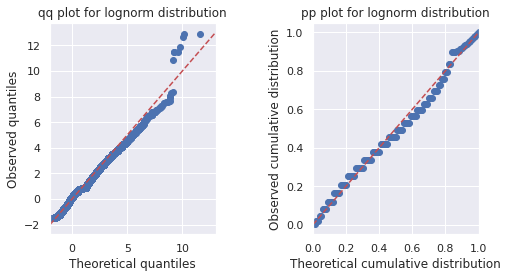

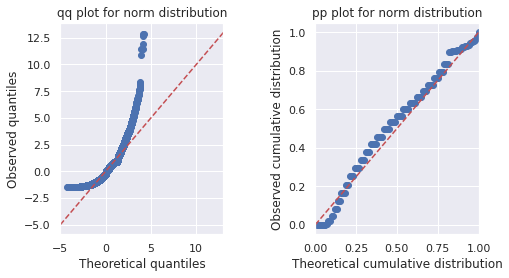

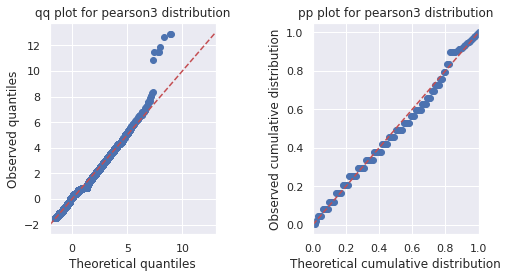

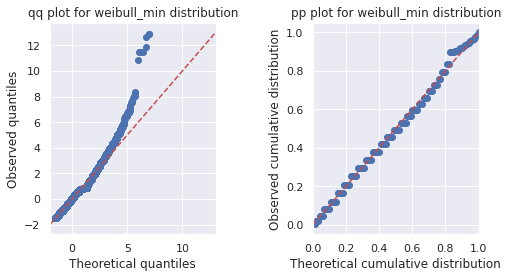

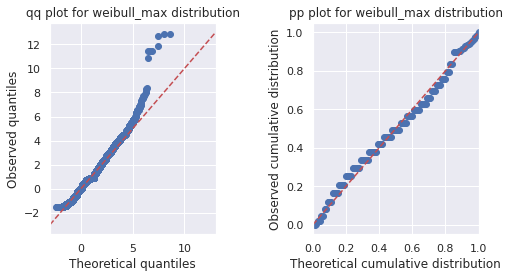

In [33]:
auto_fit(over65s['AE_Time_Mins'], pp=True)

In [25]:
under85s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434826 entries, 0 to 477148
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           434826 non-null  int64         
 1   Age_Band             434826 non-null  object        
 2   Sex                  434824 non-null  float64       
 3   AE_Arrive_Date       434826 non-null  datetime64[ns]
 4   AE_Arrive_HourOfDay  434826 non-null  object        
 5   AE_Time_Mins         434826 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 23.2+ MB


In [26]:
under85s['AE_Time_Mins']

0         210.0
2         100.0
3         320.0
4         100.0
5         100.0
          ...  
477144    100.0
477145    100.0
477146     70.0
477147    120.0
477148     50.0
Name: AE_Time_Mins, Length: 434826, dtype: float64

In [27]:
data_to_fit = under85s['AE_Time_Mins']

In [28]:
data_to_fit = over65s['AE_Time_Mins']

In [29]:
from sklearn.preprocessing import StandardScaler
import scipy

In [31]:
cum_observed_frequency

array([  2479,   2479,   6205,   6205,  10797,  15858,  15858,  15858,
        21598,  21598,  27384,  33136,  33136,  33136,  38850,  38850,
        44294,  44294,  49776,  49776,  55010,  55010,  60216,  65095,
        65095,  69819,  69819,  74286,  74286,  78745,  82912,  82912,
        87069,  91354,  91354,  95544,  95544,  99839, 104321, 104321,
       109870, 109870, 109870, 118401, 120137, 123765, 125853, 128941,
       131719])

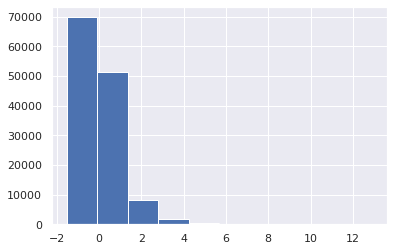

In [32]:
plt.hist(y_std);